In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ebinjomonkottakal/laptop_price_prediction/main/laptop_data.csv')
data.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
834,834,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,87912.00
1270,1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
258,258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14kg,133146.72
404,404,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.8kg,119826.72
545,545,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.1kg,37589.04


In [ ]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
print('DUPLICATE VALUES: ')
print(data[data.duplicated()])
print('_'*40)
print('NULL VALUES')
print(data.isna().sum())

DUPLICATE VALUES: 
Empty DataFrame
Columns: [Unnamed: 0, Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []
________________________________________
NULL VALUES
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [ ]:
for col in data.columns:
    print('-------'+col+'-------')
    print(data[col].value_counts())
    print('_'*80)

-------Unnamed: 0-------
0       1
856     1
874     1
873     1
872     1
       ..
433     1
432     1
431     1
430     1
1302    1
Name: Unnamed: 0, Length: 1303, dtype: int64
________________________________________________________________________________
-------Company-------
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
________________________________________________________________________________
-------TypeName-------
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
_____________________________________________________________________________

# EXPLORATORY DATA ANALYSIS

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
#QUANTITATIVE FEATURES
quantitative = data[['Weight','Price','Gpu','Cpu']]
#QUALITATIVE FEATURES
qualitative = data[['Company','Ram','Memory','OpSys','ScreenResolution','Inches','TypeName']]

**QUALITATIVE FEATURES**

In [ ]:
qualitative.head()

,Company,Ram,Memory,OpSys,ScreenResolution,Inches,TypeName
0,Apple,8GB,128GB SSD,macOS,IPS Panel Retina Display 2560x1600,13.3,Ultrabook
1,Apple,8GB,128GB Flash Storage,macOS,1440x900,13.3,Ultrabook
2,HP,8GB,256GB SSD,No OS,Full HD 1920x1080,15.6,Notebook
3,Apple,16GB,512GB SSD,macOS,IPS Panel Retina Display 2880x1800,15.4,Ultrabook
4,Apple,8GB,256GB SSD,macOS,IPS Panel Retina Display 2560x1600,13.3,Ultrabook


In [ ]:
qualitative['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

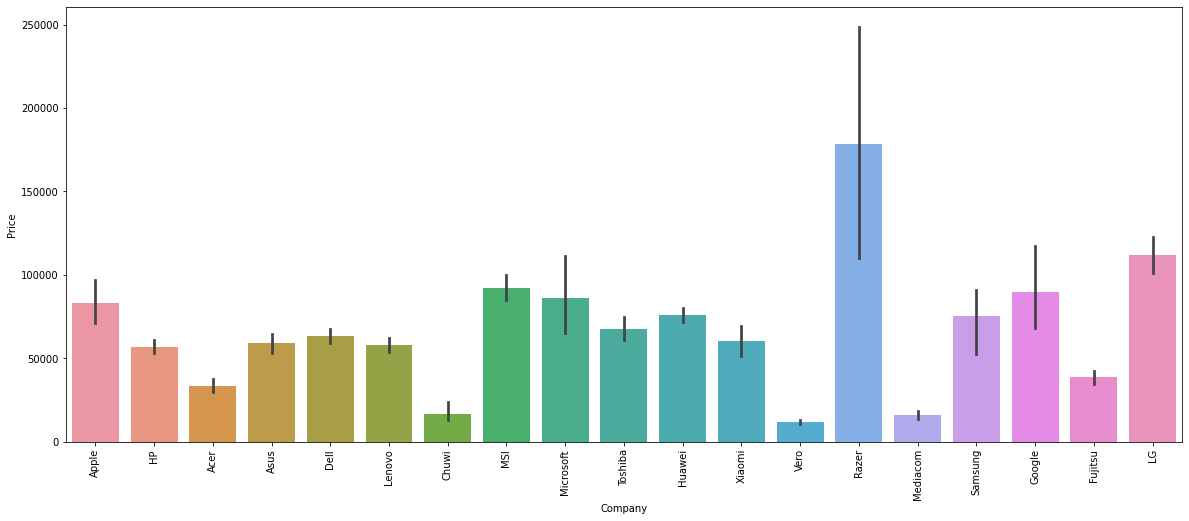

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Company',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

* *We have to list low value_count companies into a new value called others*

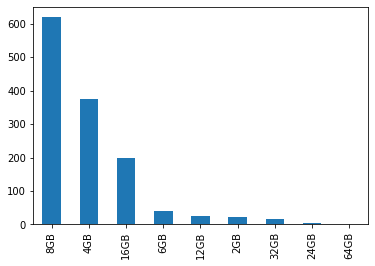

In [ ]:
#RAM
data['Ram'].value_counts().plot(kind='bar')

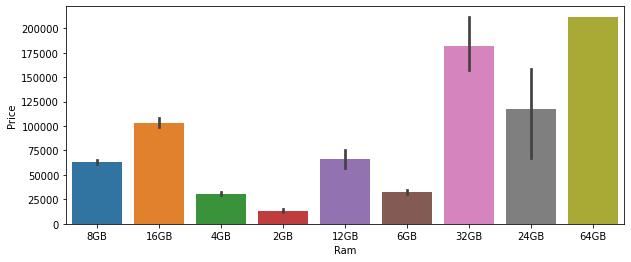

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='Ram',y='Price',data=data)

* *We have to change value into numeric type by removeing 'GB'*

In [ ]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

* *we have to treat SSD,HHD,HYBRID,FLASH STORAGE differently and identify how they relate to price*

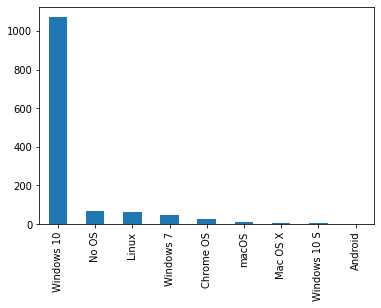

In [ ]:
#Operating System
data['OpSys'].value_counts().plot(kind='bar')

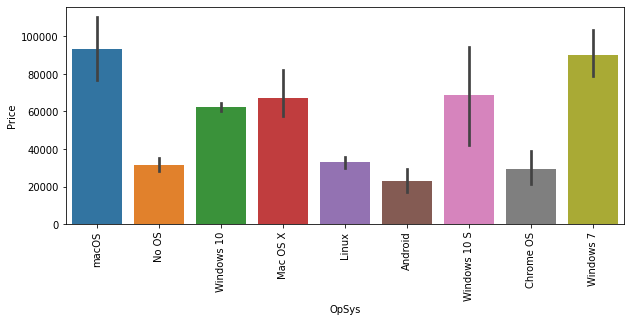

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='OpSys',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

* *Windows 10 has more counts than others,So we have to scale it*

In [ ]:
#Screen Resolution
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* *There are more different values,we have to aggregate them into different groups*

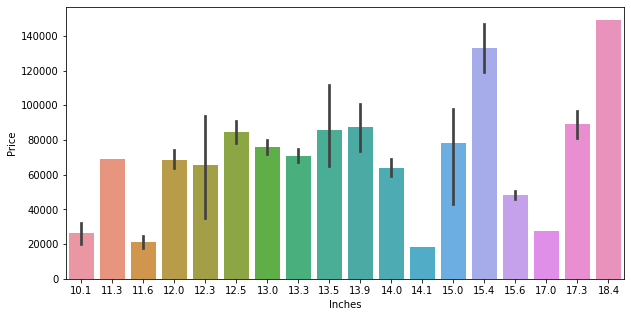

In [ ]:
#Inches
plt.figure(figsize=(10,5))
sns.barplot(x='Inches',y='Price',data=data)

* *We have to reduce the no: of values into small*

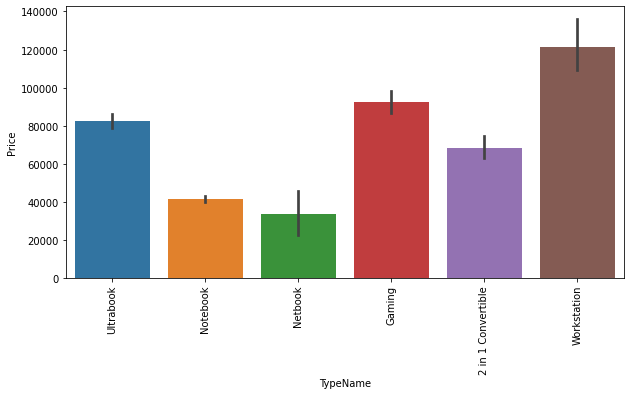

In [ ]:
#Type Name
plt.figure(figsize=(10,5))
sns.barplot(x='TypeName',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**QUANTITATIVE FEATURES**

In [ ]:
quantitative.head()

,Weight,Price,Gpu,Cpu
0,1.37kg,71378.6832,Intel Iris Plus Graphics 640,Intel Core i5 2.3GHz
1,1.34kg,47895.5232,Intel HD Graphics 6000,Intel Core i5 1.8GHz
2,1.86kg,30636.0000,Intel HD Graphics 620,Intel Core i5 7200U 2.5GHz
3,1.83kg,135195.3360,AMD Radeon Pro 455,Intel Core i7 2.7GHz
4,1.37kg,96095.8080,Intel Iris Plus Graphics 650,Intel Core i5 3.1GHz


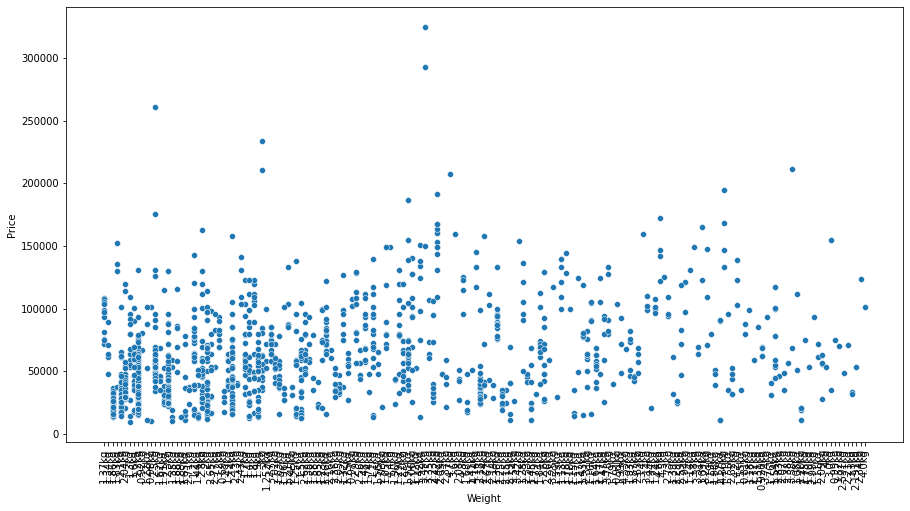

In [ ]:
#Weight
plt.figure(figsize=(15,8))
sns.scatterplot(x='Weight',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

* *We have to deal with the 'Kg' to convert the value to numeric*
* *And then we can reduce them into bins*

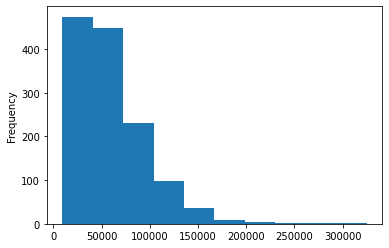

In [ ]:
#Price
data['Price'].plot(kind='hist')

In [ ]:
#Cpu
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

* *We have to reduce the count into bins*

In [ ]:
#GPU


# FEATURE ENGINEERING

In [ ]:
qualitative.sample(5)

,Company,Ram,Memory,OpSys,ScreenResolution,Inches,TypeName
608,Lenovo,8GB,256GB SSD,Windows 10,IPS Panel Full HD / Touchscreen 1920x1080,15.6,2 in 1 Convertible
463,Lenovo,8GB,512GB SSD,No OS,IPS Panel Full HD 1920x1080,14.0,Notebook
509,Lenovo,8GB,256GB SSD + 1TB HDD,No OS,IPS Panel Full HD 1920x1080,15.6,Gaming
1216,Acer,4GB,1TB HDD,Windows 10,1600x900,17.3,Notebook
311,Dell,16GB,1TB SSD,Windows 10,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,13.3,Ultrabook


**COMPANY**

In [ ]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
def reduce_company(name):
    big_companies=['Dell','Lenovo','HP','Asus','Acer','MSI','Toshiba','Apple']
    if name not in big_companies:
        return 'others'
    else:
        return name

In [ ]:
data['Company']=data['Company'].apply(lambda x:reduce_company(x))
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
others      51
Toshiba     48
Apple       21
Name: Company, dtype: int64

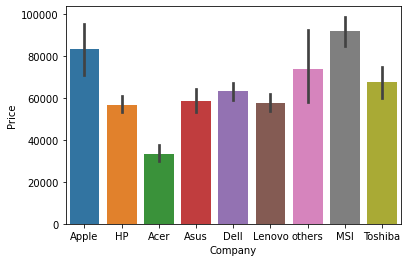

In [ ]:
sns.barplot(x='Company',y='Price',data=data)

**RAM**

In [ ]:
data['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

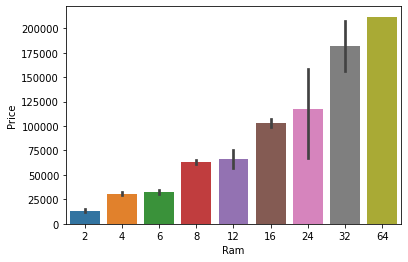

In [ ]:
data['Ram']=data['Ram'].str.replace("GB",'').astype(int)
sns.barplot(x='Ram',y='Price',data=data)

**MEMORY**

In [ ]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
data['Memory']=data['Memory'].str.replace('TB','000')
data['Memory'] = data['Memory'].str.replace('GB','')

In [ ]:
num = data['Memory'].str.split("+",n=1,expand=True)
num.sample(10)
data['First'] = num[0]
data['Second']=num[1]
data['Second'] = data['Second'].apply(lambda x:0 if x is None else x)

data['HDD1']=data['First'].apply(lambda x: int(float(x.split()[0])) if 'HDD' in x else 0)
data['HDD2']=  data['Second'].apply(lambda x: int(float(x.split()[0])) if 'HDD' in str(x) else 0)  
data['HDD'] = data['HDD1']+data['HDD2']

data['SSD1']=data['First'].apply(lambda x: int(float(x.split()[0])) if 'SSD' in x else 0)
data['SSD2']=  data['Second'].apply(lambda x: int(float(x.split()[0])) if 'SSD' in str(x) else 0) 
data['SSD'] = data['SSD1']+data['SSD2']

data['Flash1']=data['First'].apply(lambda x: int(float(x.split()[0])) if 'Flash' in x else 0)
data['Flash2']=  data['Second'].apply(lambda x: int(float(x.split()[0])) if 'Flash' in str(x) else 0) 
data['Flash'] = data['Flash1']+data['Flash2']

data['Hybrid1']=data['First'].apply(lambda x: int(float(x.split()[0])) if 'Hybrid' in x else 0)
data['Hybrid2']=  data['Second'].apply(lambda x: int(float(x.split()[0])) if 'Hybrid' in str(x) else 0) 
data['Hybrid'] = data['Hybrid1']+data['Hybrid2']

data.drop(columns=['HDD1','HDD2','SSD1','SSD2','Flash1','Flash2','Hybrid1',"Hybrid2",'First','Second','Memory'],inplace=True)

In [ ]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,HDD,SSD,Flash,Hybrid
292,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,Intel HD Graphics 520,Windows 10,2.54kg,26053.9200,1000,0,0,0
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,0,256,0,0
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,Intel HD Graphics,Windows 10,2.2kg,19660.3200,500,0,0,0
565,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.21kg,85194.7200,0,128,0,0
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,Intel HD Graphics,Windows 10,2.2kg,19660.3200,500,0,0,0
1102,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,4,Intel HD Graphics,Chrome OS,2.20kg,11135.5200,0,16,0,0
429,others,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,Intel HD Graphics 500,Windows 10,1.16kg,15930.7200,0,32,0,0
1242,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,Intel HD Graphics 520,Linux,2.4kg,19276.7040,500,0,0,0
344,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,Intel UHD Graphics 620,Windows 10,1.2kg,84129.1200,0,256,0,0
781,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,Nvidia GeForce GTX 1070,Windows 10,4.3kg,125208.0000,1000,256,0,0


**OPERATING SYSTEM**

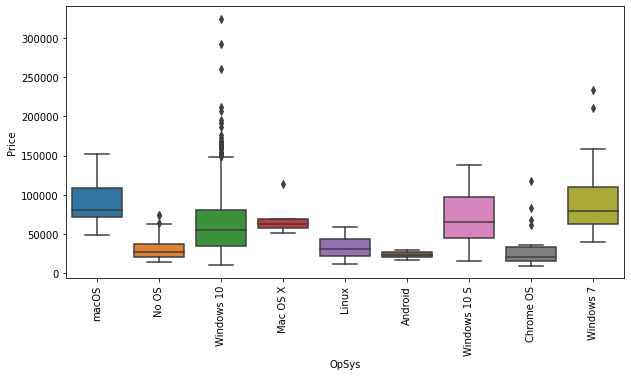

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='OpSys',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**SCREEN RESOLUTION**

In [ ]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
data['IPS'] = data['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
data['Full_HD'] = data['ScreenResolution'].apply(lambda x : 1 if 'Full HD' in x else 0)

list_X = []
for n in data['ScreenResolution'].str.split('x',n=1,expand=True)[0].str.split().tolist():
    list_X.append(int(n[-1]))
    
pd.Series(list_X)


data['X_Res'] = list_X
data['Y_Res'] = data['ScreenResolution'].str.split('x',n=1,expand=True)[1].astype(int)
data['PPI'] = (((data['X_Res']**2) + (data['Y_Res']**2))**0.5/data['Inches']).astype('float')
data.drop(columns=['X_Res','Y_Res','ScreenResolution','Inches'],inplace = True)

**TYPENAME**

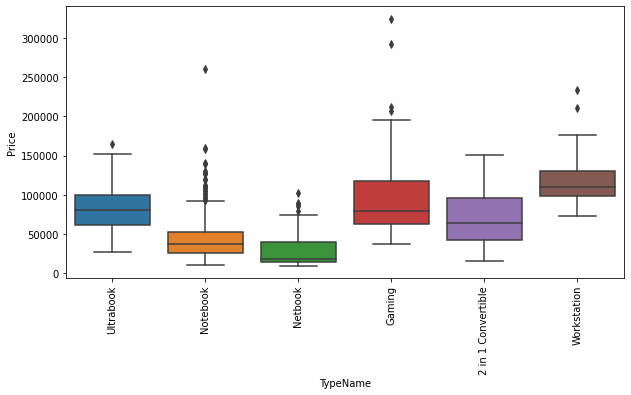

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TypeName',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**CPU**

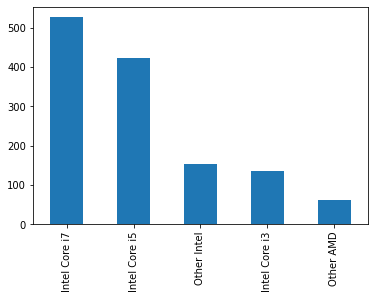

In [ ]:
data["Cpu_Name"]=data['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
def cpu_brand(value):
    if (value=='Intel Core i7') or (value=='Intel Core i5') or (value=='Intel Core i3'):
        return value
    else:
        if(value.split()[0] == 'Intel'):
            return 'Other Intel'
        else:
            return 'Other AMD'
data['Cpu_brand'] = data['Cpu_Name'].apply(cpu_brand)
data['Cpu_brand'].value_counts().plot(kind='bar')
data.drop(columns=['Cpu_Name','Cpu'],inplace=True)

**GPU**

In [ ]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data = data[data['Gpu brand'] != 'ARM']

In [ ]:
data.drop(columns=['Gpu'],inplace=True)

**OPERATING SYSTEM**

In [ ]:
def cat_os(inp):
    if (inp == 'Windows 10') or (inp == 'Windows 7') or (inp == 'Windows 10 S'):
        return 'Windows'
    elif (inp == 'macOS') or (inp == 'Mac OS X'):
        return 'Mac'
    else:
        return 'Others'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

**WEIGHT**

In [ ]:
data['Weight']=data['Weight'].str.replace('kg','').astype(float).astype(int)
data['Weight'].value_counts()

2    628
1    567
3     54
4     35
0     18
Name: Weight, dtype: int64

In [ ]:
data.corr()['Price']

Ram            0.742905
Weight         0.173350
Price          1.000000
HDD           -0.095925
SSD            0.670660
Flash         -0.040067
Hybrid        -0.004784
IPS            0.253320
TouchScreen    0.192917
Full_HD        0.198093
PPI            0.475368
Name: Price, dtype: float64

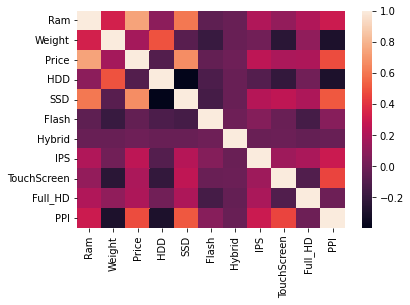

In [ ]:
sns.heatmap(data.corr())

In [ ]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

# BUILDING MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


**LINEAR REGRESSION**

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,HDD,SSD,Flash,Hybrid,IPS,TouchScreen,Full_HD,PPI,Cpu_brand,Gpu brand,os
0,Apple,Ultrabook,8,1,71378.6832,0,128,0,0,1,0,0,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1,47895.5232,0,0,128,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1,30636.0000,0,256,0,0,0,0,1,141.211998,Intel Core i5,Intel,Others
3,Apple,Ultrabook,16,1,135195.3360,0,512,0,0,1,0,0,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1,96095.8080,0,256,0,0,1,0,0,226.983005,Intel Core i5,Intel,Mac


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8036122797109184
MAE 0.21522082596382436


**RIDGE REGRESSION**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.815141458878013
MAE 0.20927583047499795


**LASSO REGRESSION**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8078331421328123
MAE 0.21140329297439425


**KNN**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8124828384931102
MAE 0.19288000303994382


**DESICION TREE**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8258756982643103
MAE 0.19681963342614042


**SVM**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8043490771291755
MAE 0.20230947028044552


**RANDOM FOREST**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8778344165436136
MAE 0.16668453118932158


**EXTRA TREES**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              bootstrap=True,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8740006366077574
MAE 0.16850478542831845


**ADABOOST**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7702124842833726
MAE 0.241826626166716


**GRADIENT BOOST**

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8849980899429775
MAE 0.16134462905836655


XGBOOST

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[00:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8841272543136018
MAE 0.161206135374078


VOTING REGRESSOR

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[00:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8818389413970865
MAE 0.16505451297236035


**STACKING**

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,-1,-2,-3])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,bootstrap=True,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[00:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8756183163337437
MAE 0.17204795084800195
